In [66]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Importing data from binding.csv file

In [67]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from lit_plot_funcs import OSDAS as osdas
from lit_plot_funcs import make_axis_templating_plot, make_binding_templating_plot
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

IPythonConsole.ipython_useSVG = True
filename = os.path.join((os.path.dirname(os.path.realpath("__file__"))), "binding_upd.csv")
df = pd.read_csv(filename)  # noqa: PD901

# set the fonts for any plots you might make
mpl.font_manager.findSystemFonts(fontpaths=None, fontext="ttf")
mpl.font_manager.findfont("Arial")
plt.rcParams["figure.dpi"] = 300
plt.rcParams["font.family"] = "Arial"

grid_kws = {"width_ratios": (0.45, 0.45, 0.02), "hspace": 0.3}
color_option = "Templating"

BIND_LIMS = [-20, 0.1]
TEMP_LIMS = [14, 28.1]
SCS_LIMS = [0.8, 4.0]

VOL_LIMS = [50, 450]
COMP_LIMS = [-2, 12]

# Defining a few useful functions

Below, we start defining a few useful functions and parameters to help us plot more efficiently

In [68]:
cmap = "inferno_r"
scatter_kws = {
    "linewidths": 0.7,
    "edgecolors": "k",
    "s": 60,
}

In [69]:
# This code generates binding and templating energy plot towards KFI framework.
color_option = "Competition (SiO2)"
zeolite = "KFI"

# Making images for the molecules of interest for lta cage-based zeolites

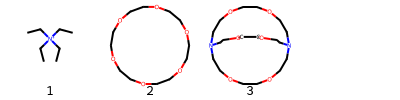

In [70]:
rdkit_mols = [Chem.MolFromSmiles(smi) for smi in osdas.values()]
Draw.MolsToGridImage(
    rdkit_mols,
    molsPerRow=4,
    subImgSize=(100, 100),
    legends=[str(i) for i in osdas],
)

# Generating plots for LTA framework

Plotting the binding energy, templating energy, and shape selectivity with respect to LTA

In [71]:
print(df.columns)

Index(['crystal_id', 'SMILES', 'Zeolite', 'InchiKey', 'Ligand formula',
       'loading', 'Binding (SiO2)', 'Binding (OSDA)', 'Directivity (SiO2)',
       'Competition (SiO2)', 'Competition (OSDA)', 'Templating', 'SCScore',
       'Volume (Angstrom3)', 'Axis 1 (Angstrom)', 'Axis 2 (Angstrom)',
       'In literature?', 'Germanosilicate composition?',
       'Zeolite composition?', 'Zeotype composition?'],
      dtype='object')


In [72]:
y2 = "Templating"

zeos = ["LTA", "RHO", "KFI", "UFI"]

data_dict = {
    "Templating": [],
    "Competition (SiO2)": [],
    # "SCScore": [],
    "Volume (Angstrom3)": [],
}

for zeolite in zeos:
    d = df.loc[
        (df["Zeolite"] == zeolite)
        & (df[y2] > TEMP_LIMS[0])
        & (df[y2] < TEMP_LIMS[1] - 0.1)
        & (df["Volume (Angstrom3)"] > VOL_LIMS[0])
        & (df["Volume (Angstrom3)"] < VOL_LIMS[1])
    ].sort_values("Templating", ascending=False)

    for sp in osdas.values():
        try:
            spiro_data = d.loc[d["SMILES"] == sp].iloc[0]
            print(f"{sp} in {zeolite} exists")
            for key in data_dict:  # noqa: PLC0206
                data_dict[key].append(spiro_data[key])
        except IndexError:  # noqa: PERF203
            print(f"{sp} not found in {zeolite}")

for key in data_dict:  # noqa: PLC0206
    data_dict[key] = np.array(data_dict[key])
    print(key, min(data_dict[key]), max(data_dict[key]))

CC[N+](CC)(CC)CC in LTA exists
C1COCCOCCOCCOCCOCCO1 in LTA exists
C1COCCN2CCOCCOCCN(CCO1)CCOCCOCC2 in LTA exists
CC[N+](CC)(CC)CC in RHO exists
C1COCCOCCOCCOCCOCCO1 in RHO exists
C1COCCN2CCOCCOCCN(CCO1)CCOCCOCC2 in RHO exists
CC[N+](CC)(CC)CC in KFI exists
C1COCCOCCOCCOCCOCCO1 in KFI exists
C1COCCN2CCOCCOCCN(CCO1)CCOCCOCC2 in KFI exists
CC[N+](CC)(CC)CC in UFI exists
C1COCCOCCOCCOCCOCCO1 in UFI exists
C1COCCN2CCOCCOCCN(CCO1)CCOCCOCC2 in UFI exists
Templating 15.4631586 21.84327673
Competition (SiO2) 0.652602845 10.9206042
Volume (Angstrom3) 161.184 371.368


In [73]:
print(data_dict)

{'Templating': array([21.79486843, 19.07568819, 15.75846356, 21.03955172, 18.18930999,
       15.4631586 , 18.82785308, 20.55263266, 18.38755872, 21.84327673,
       19.07004981, 16.81699063]), 'Competition (SiO2)': array([ 9.5241575 ,  5.36314255,  0.65260284,  8.15967523,  4.80328621,
        0.87059212,  4.34377399,  9.47396022,  6.83383942, 10.9206042 ,
        7.06287998,  3.99946677]), 'Volume (Angstrom3)': array([161.184, 256.488, 371.368, 161.184, 256.488, 371.368, 161.184,
       256.488, 371.368, 161.184, 256.488, 371.368])}


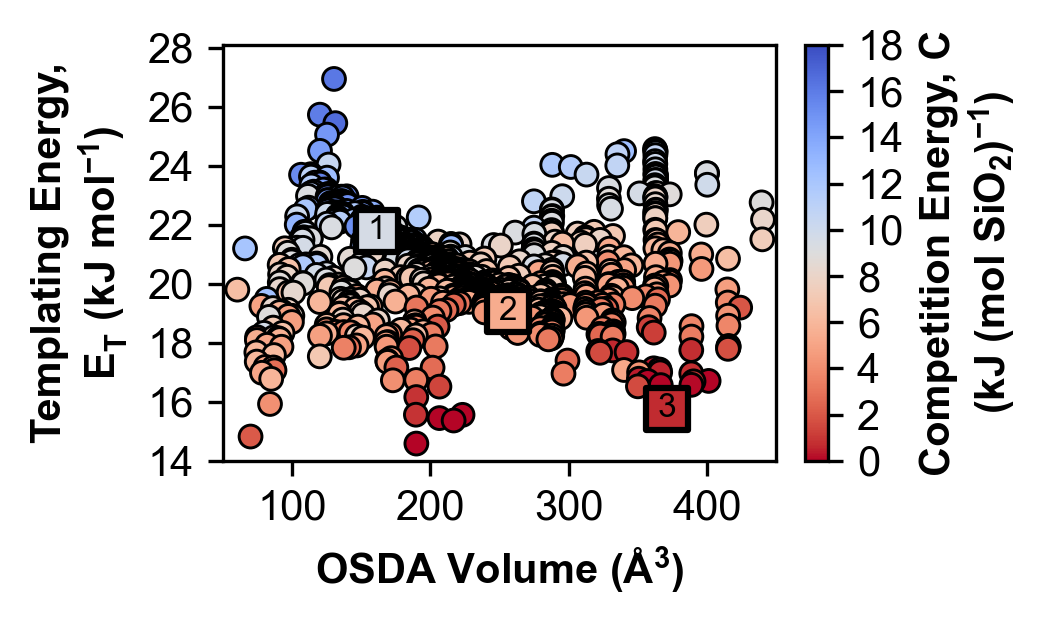

In [74]:
zeolite = "LTA"
color_option = "Competition (SiO2)"

make_binding_templating_plot(df, zeolite, color_option)

/home/ajhoffman/local_files/002.analysis_files/004.subunit_direction/902.from_soon/updated_250318/lit_plot_funcs.py:383: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.show()


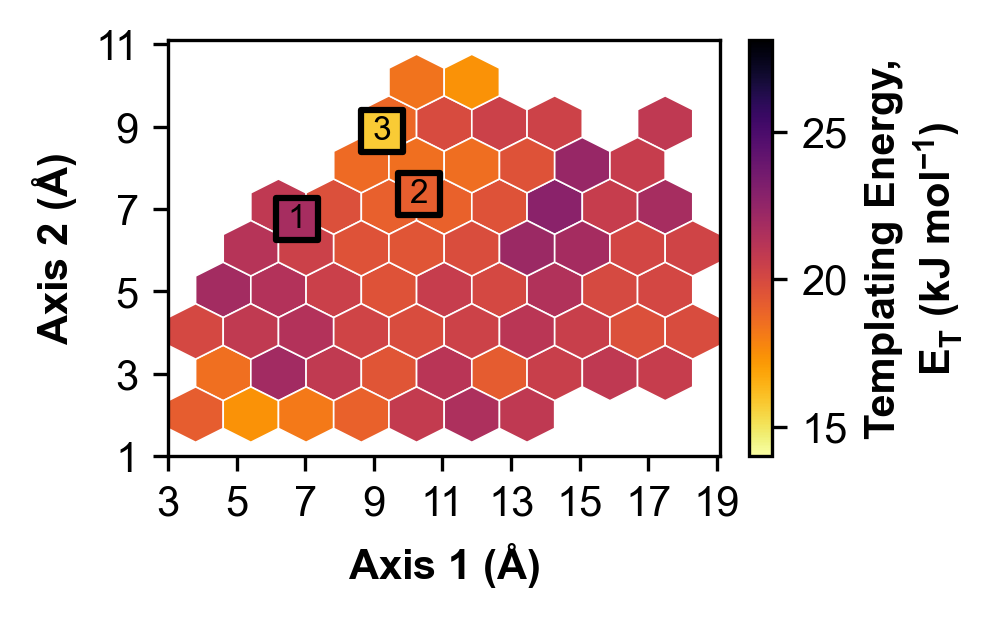

In [75]:
color_option = "Templating"
make_axis_templating_plot(df, zeolite, color_option)

# Generating plots for KFI framework
Plotting the binding energy, templating energy, and shape selectivity with respect to KFI

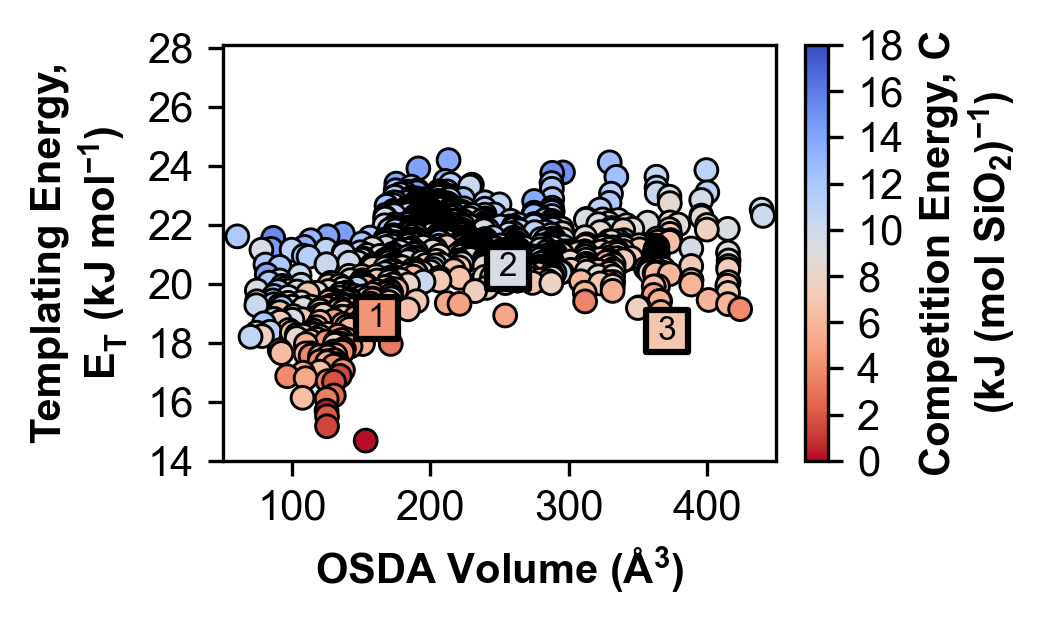

In [76]:
# This code generates binding and templating energy plot towards KFI framework.
zeolite = "KFI"
color_option = "Competition (SiO2)"
temp_lims = [14, 24.1]

make_binding_templating_plot(df, zeolite, color_option)

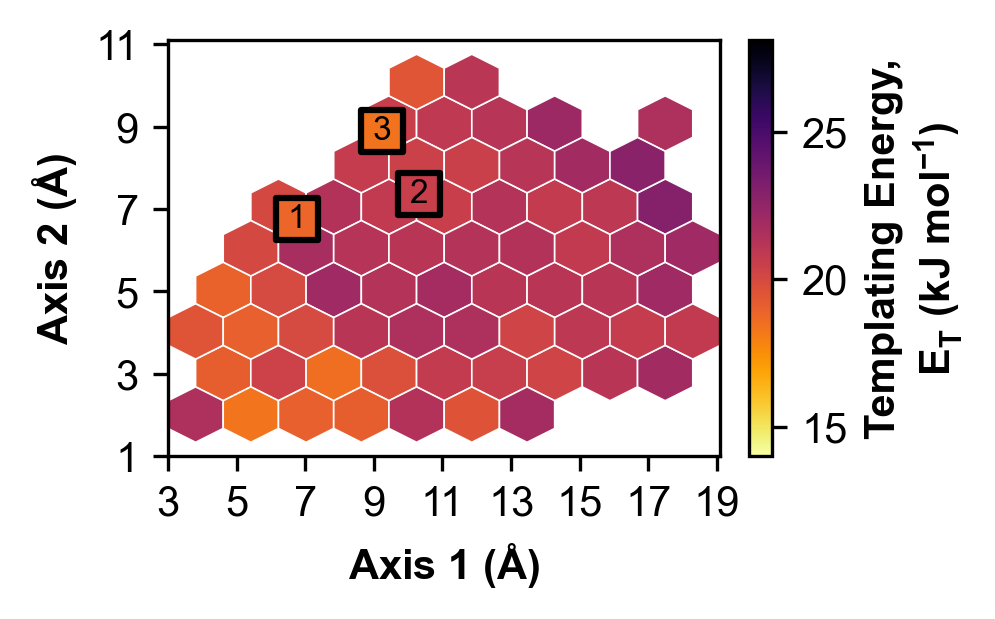

In [77]:
color_option = "Templating"
templating_norm = [-10, 0]

make_axis_templating_plot(df, zeolite, color_option, template_norm=templating_norm)

# Generating plots for RHO framework
Plotting the binding energy, templating energy, and shape selectivity with respect to RHO

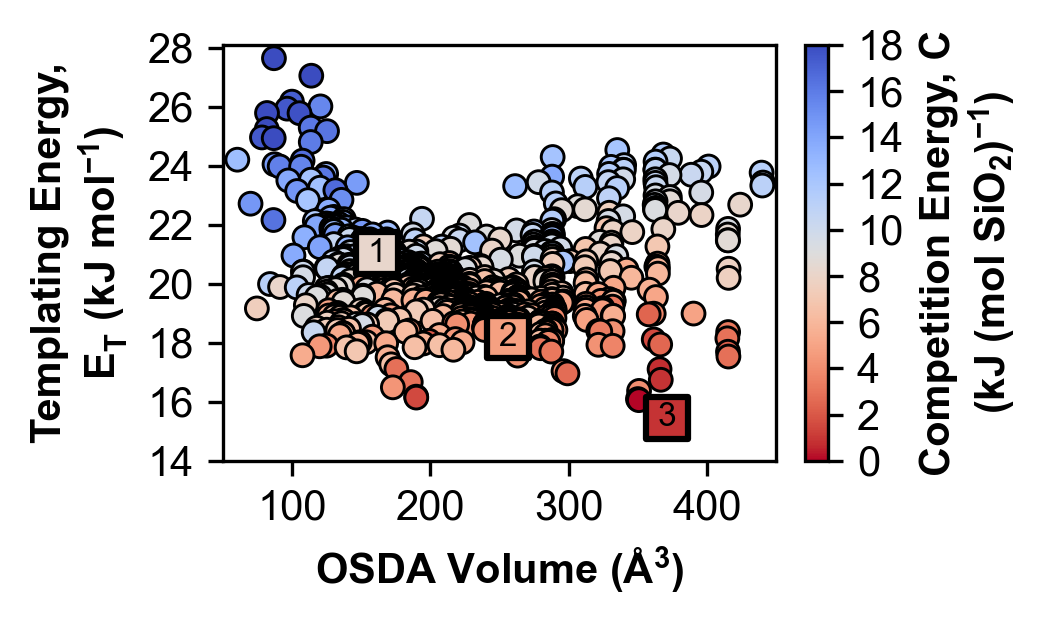

In [78]:
# This code generates binding and templating energy plot towards RHO framework.
color_option = "Competition (SiO2)"
zeolite = "RHO"
temp_lims = [14, 28.1]

make_binding_templating_plot(df, zeolite, color_option, temp_lims=temp_lims)

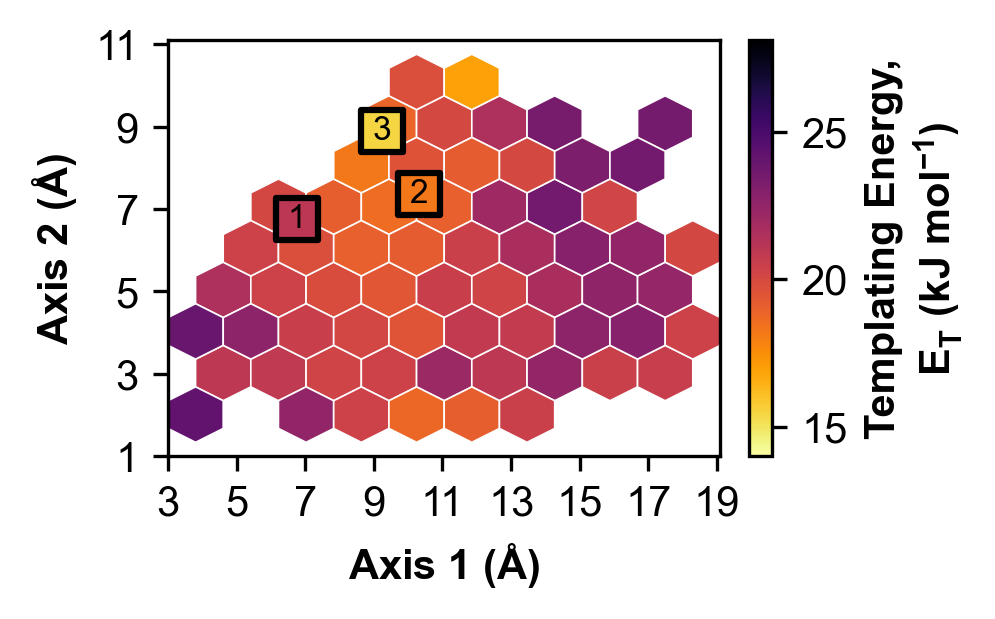

In [79]:
# This code generates the shape selectivity towards RHO zeolite framework.
# Color code is the templating energy
color_option = "Templating"
cmap = "inferno_r"
# templating_norm = [-18, 0]

make_axis_templating_plot(df, zeolite, color_option)

# Generating plots for UFI framework
Plotting the binding energy, templating energy, and shape selectivity with respect to UFI

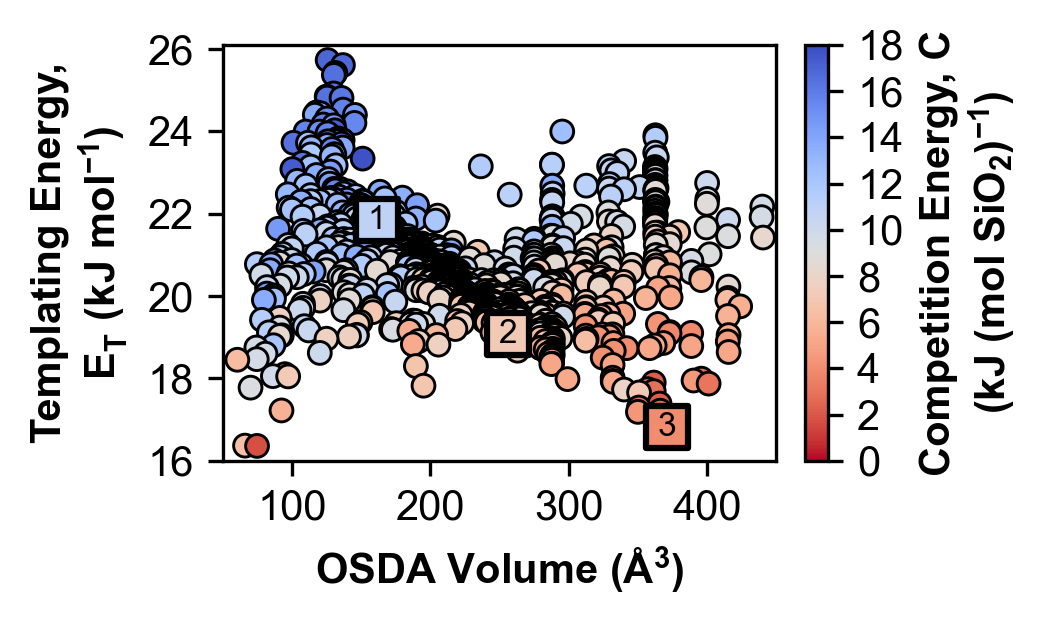

In [80]:
# This code generates binding and templating energy plot towards UFI framework.
color_option = "Competition (SiO2)"
zeolite = "UFI"
temp_lims = [16, 26.1]

make_binding_templating_plot(df, zeolite, color_option, temp_lims=temp_lims)

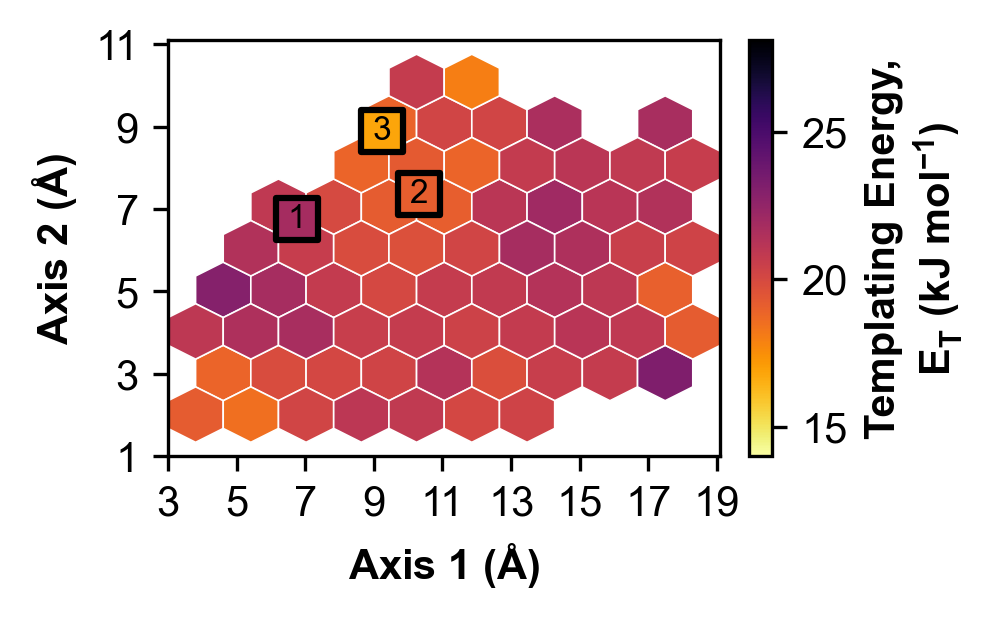

In [81]:
# This code generates the shape selectivity towards RHO zeolite framework.
# Color code is the templating energy
color_option = "Templating"
cmap = "inferno_r"
templating_norm = [-18, 0]

make_axis_templating_plot(df, zeolite, color_option, template_norm=templating_norm)